In [31]:
import pickle
import os

# paths to the saved .p files
data_dir = "results_generation/last results/Generation_PF00959_model_lr_00001_fine_tuned_due/"
predicted_data_file = os.path.join(data_dir, "predicted_data_p0.50_p1.2_t_0.9.p") 
predicted_stopped_file = os.path.join(data_dir, "predicted_stopped_data_p0.50_p1.2_t_0.9.p") 

#predicted_data_file = os.path.join(data_dir, "predicted_data_p0.50_p1.2_t_0.9.p") 
#predicted_stopped_file = os.path.join(data_dir, "predicted_stopped_data_p0.50_p1.2_t_0.9.p") 


# Reload predicted_data from the .p file
predicted_data = False
with open(predicted_data_file, "rb") as file:
    predicted_data = pickle.load(file)

# Reload predicted_data stopped from the .p file
predicted_stopped_data = False
with open(predicted_stopped_file, "rb") as file:
    predicted_stopped_data = pickle.load(file)


In [32]:
len(predicted_data)

1500

In [33]:
len(predicted_stopped_data)

11545

In [34]:
add = 0
for i in predicted_stopped_data:
    add += len(i)
add /=len(predicted_stopped_data)
print(add)

219.33720225205718


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def compute_len(data):
    len_all = []
    for entry in data:
        tmp_len = len(entry)
        len_all.append(tmp_len)
    return len_all

def plot_histogram(data, bin_step, name):
    # Create the histogram
    max_val = max(data)
    bin_edges = list(range(0, max_val + bin_step, bin_step))
    #print(bin_edges)
    plt.figure(figsize=(11, 6))
    n, bins, _ = plt.hist(data, bins=bin_edges, color=(180/255, 211/255, 178/255), edgecolor='black', alpha=0.99, rwidth=0.87)    
    print(n)
    print(bins)
    # Title, labels, and legend
    plt.title('Histogram of Sequence Length Ranges')
    plt.xlabel('Sequence Length')
    plt.ylabel('Number of Instances')
    plt.legend()
    plt.savefig(name + '_Histogram.svg')
    # Display the plot
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[   0. 6322. 3840.  911.  448.   24.]
[  0 100 200 300 400 500 600]


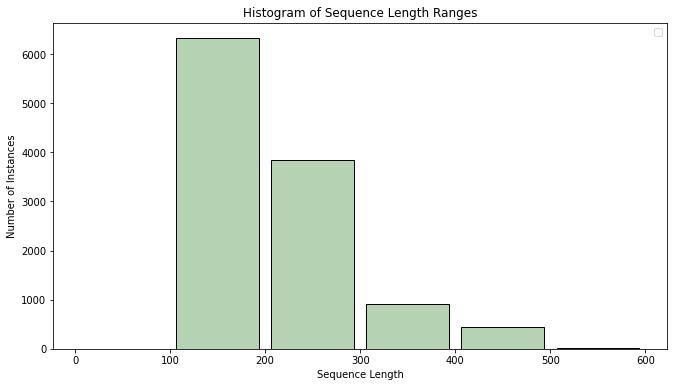

In [39]:
len_data = compute_len(predicted_stopped_data)
plot_histogram(len_data, 100, 'PF_generation1')

In [38]:
# we have a list of amino acid sequences, function to transform it into a FASTA format file
def list_to_fasta(sequences, file_name="output.fasta"):
    with open(file_name, 'w') as file:
        for idx, sequence in enumerate(sequences):
            # Writing the header for each sequence
            file.write(f">Sequence_{idx + 1}\n")
            # Writing the amino acid sequence
            file.write(f"{sequence}\n")

#list_to_fasta(predicted_stopped_data, file_name="predicted_stopped_075.fasta")
list_to_fasta(predicted_stopped_data, file_name="predicted_stopped_050.fasta")

In [9]:
def lysozyme_to_fasta(sequences, file_name="output.fasta"):
    with open(file_name, 'w') as file:
        for seq in sequences:
            # Extracting accession identifier and sequence
            accession = seq['sequence']['metadata']['accession']
            sequence = seq['sequence']['metadata']['sequence']
            # Writing the header with accession identifier
            file.write(f">{accession}\n")
            # Writing the amino acid sequence
            file.write(f"{sequence}\n")
            

lysozyme_data_file = os.path.join("data/filtered_data_PF00959.p") 
# Reload predicted_data from the .p file
lysozyme_data = False
with open(lysozyme_data_file, "rb") as file:
    lysozyme_data = pickle.load(file)

print(type(lysozyme_data))
print(lysozyme_data[0])

lysozyme_to_fasta(lysozyme_data, file_name="lysozymes_db.fasta")

<class 'list'>
{'metadata': {'accession': 'A0A009F987', 'name': 'Lysozyme', 'source_database': 'unreviewed', 'length': 164, 'source_organism': {'taxId': '1310618', 'scientificName': 'Acinetobacter baumannii 118362', 'fullName': 'Acinetobacter baumannii 118362'}}, 'entries': [{'accession': 'PF00959', 'entry_protein_locations': [{'fragments': [{'start': 65, 'end': 163, 'dc-status': 'CONTINUOUS'}], 'model': 'PF00959', 'score': 5e-21}], 'protein_length': 164, 'source_database': 'pfam', 'entry_type': 'domain', 'entry_integrated': 'ipr002196'}], 'sequence': {'metadata': {'accession': 'A0A009F987', 'id': 'A0A009F987_ACIBA', 'source_organism': {'taxId': '1310618', 'scientificName': 'Acinetobacter baumannii 118362', 'fullName': 'Acinetobacter baumannii 118362'}, 'name': 'Lysozyme', 'description': None, 'length': 164, 'sequence': 'MTTKPFFDAARVIAGGKLTQAQVDELNKVVNKLAPGGKTTSDFGVNLITGFEGTRFTAYDDGVGVWTIGTGTTVYPNGVKVKKGDTCTAEQAKTYFKHDLAKFEKTVNESVTVPINQNQFDALVSLTYNIGSGAFKGSTLLKLLNKGDYQGAADQFLVWNKAGG', 

In [10]:
# here i performed blast on the stopped databases. i have tabular data with max id hit for each sequence

In [40]:
import pandas as pd
os.listdir(data_dir)

['Galaxy8-[unique_maxID_generatedSeqOnlyKeywords_vs_swissProt_on_data_050].tabular',
 'predicted_stopped_data_p0.50_p1.2_t_0.9.p',
 'predicted_data_p0.50_p1.2_t_0.9.p',
 'Galaxy9-[unique_maxID_generatedSeqOnlyKeywords_vs_lysozymes_on_data_050].tabular']

In [52]:
tab_dir = data_dir + 'Galaxy9-[unique_maxID_generatedSeqOnlyKeywords_vs_lysozymes_on_data_050].tabular'
df = pd.read_csv(tab_dir, delimiter='\t')
print(df.head(3))

            #c1          c2      c3   c4  c5  c6  c7   c8  c9  c10  ...  c17  \
0    Sequence_1      I2UNL6  99.394  165   1   0   1  165   1  165  ...    0   
1   Sequence_10  A0A0E1FN67  99.408  169   1   0   1  169   1  169  ...    0   
2  Sequence_100  A0A2R2Q2G5  77.305  141  32   0   1  141   1  141  ...    0   

      c18 c19  c20                                                c21  \
0  100.00   1    1  MSPSLRKAVAAAIGGGAVAIASVLITGPSGDDGLEGVSYIPYEDIV...   
1  100.00   1    1  MSNKTKYIAAVLAASAAFFVGVKNDEGFTSKPVIPVKGDRPTQGHG...   
2   86.52   1    1  MKISDNGLHITKAFEGLRLKAYQCSANVWTIGYGHTKGVHPDMEIT...   

                                                 c22  c23  c24         c25  rn  
0  MSPSLRKAVAAAIGGGAVAIASVLITGPSGDDGLEGVSYIPYEDIV...  165  165      I2UNL6   1  
1  MSNKTKYIAAVLAASAAFFVGVKNDEGFTSKPVIPVKGDRPTQGHG...  174  169  A0A0E1FN67   1  
2  MIIDVNGLKLIKHFEGLRLRAYQCSANVWTIGYGHTAGVGPDDVIT...  405  141  A0A2R2Q2G5   1  

[3 rows x 26 columns]


In [54]:
c3_values = df['c3'].tolist()
len(c3_values)

11545

In [60]:
import matplotlib.pyplot as plt
def plot_histogram(data, bin_step, name):
    # Create the histogram
    bin_edges = list(range(60, 100 + bin_step, bin_step))
    #print(bin_edges)
    plt.figure(figsize=(11, 6))
    n, bins, _ = plt.hist(data, bins=bin_edges, color=(125/255, 180/255, 232/255), edgecolor=(68/255, 127/255, 176/255), alpha=0.99, rwidth=0.87)    
    print(n)
    print(bins)
    # Title, labels, and legend
    plt.title('Histogram of Max-ID Ranges')
    plt.xlabel('ID-percentage range')
    plt.ylabel('Number of Instances')
    plt.legend()
    plt.savefig(name + '_Histogram.svg')
    # Display the plot
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[   31.   305.   119. 11090.]
[ 60  70  80  90 100]


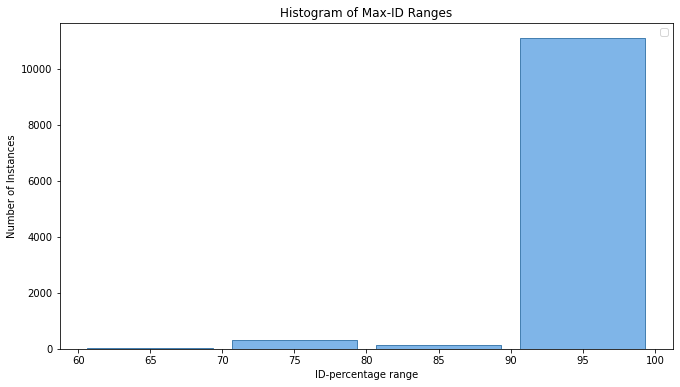

In [61]:
plot_histogram(c3_values, 10, 'max_id_050_lysozymes_generazione_solo_keywords_n_11545')